In [76]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split


RCA_data = pd.read_csv('../datasets/root_cause_analysis.csv')
RCA_data.head()


,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [77]:
label_encoder = preprocessing.LabelEncoder()
RCA_data['ROOT_CAUSE'] = label_encoder.fit_transform(RCA_data['ROOT_CAUSE'])

np_RCA = RCA_data.to_numpy()
info = np_RCA[:,1:8]
cause = np_RCA[:,8]

cause = tf.keras.utils.to_categorical(cause,3)

info_train, info_test, cause_train, cause_test = train_test_split(info, cause, test_size=0.10)


In [78]:
T_classes = len(RCA_data['ROOT_CAUSE'].unique())

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128,
                             input_shape=(7,),
                              name='Hidden-Layer-1',
                              activation='relu'))
model.add(tf.keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(tf.keras.layers.Dense(T_classes,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/home/eshulman/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,923 (70.01 KB)

 Trainable params: 17,923 (70.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6557 - loss: 0.9608 - val_accuracy: 0.7611 - val_loss: 0.7495
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 0.6576 - val_accuracy: 0.7778 - val_loss: 0.6305
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8301 - loss: 0.5005 - val_accuracy: 0.7722 - val_loss: 0.5921
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8246 - loss: 0.4470 - val_accuracy: 0.7778 - val_loss: 0.6022
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8247 - loss: 0.4280 - val_accuracy: 0.7611 - val_loss: 0.5888
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.4291 - val_accuracy: 0.7944 - val_loss: 0.5889
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 0.4293 - val_accuracy: 0.8111 - val_loss: 0.5906
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8645 - loss: 0.4069 - val_accuracy: 0.7556 - val_loss

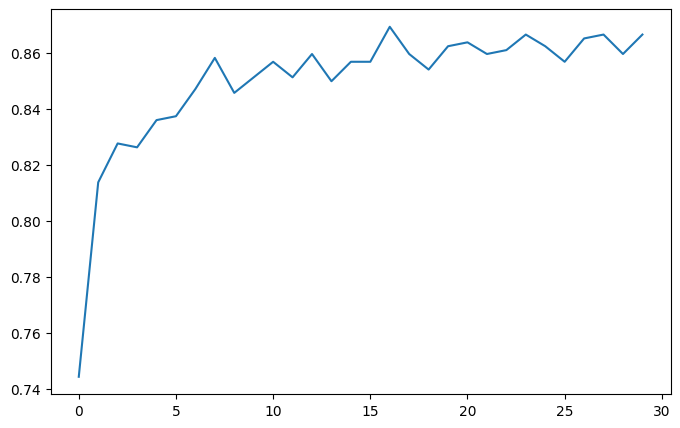

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4853


[0.49053359031677246, 0.800000011920929]

In [79]:
VERBOSE=1


BATCH_SIZE=64
EPOCHS=30
VALIDATION_SPLIT=0.2

history=model.fit(info_train,
          cause_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.show()

model.evaluate(info_test,cause_test)

In [82]:
prediction_input = np.array([[0,0,0,0,1,0,1]])
raw_prediction = model.predict(prediction_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Raw Prediction Output (Probabilities) : [[0.23440422 0.6802117  0.08538404]]
Prediction is  ['MEMORY_LEAK']
